# IMPORTS

In [208]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
import re
from matplotlib.patches import ConnectionPatch

In [209]:
project_root = '/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA'

# LOAD IMAGES AND TRANSFORMATIONS

In [223]:
images = glob.glob(project_root + '/hpatches-sequences-release/v_london/*.ppm')
transformations = glob.glob(project_root + '/hpatches-sequences-release/v_london/H*')

In [224]:
images = sorted(images)
transformations = sorted(transformations)

In [225]:
images

['/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA/hpatches-sequences-release/v_london/1.ppm',
 '/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA/hpatches-sequences-release/v_london/2.ppm',
 '/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA/hpatches-sequences-release/v_london/3.ppm',
 '/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA/hpatches-sequences-release/v_london/4.ppm',
 '/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA/hpatches-sequences-release/v_london/5.ppm',
 '/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA/hpatches-sequences-release/v_london/6.ppm']

In [226]:
transformations

['/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA/hpatches-sequences-release/v_london/H_1_2',
 '/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA/hpatches-sequences-release/v_london/H_1_3',
 '/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA/hpatches-sequences-release/v_london/H_1_4',
 '/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA/hpatches-sequences-release/v_london/H_1_5',
 '/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA/hpatches-sequences-release/v_london/H_1_6']

### IMAGES

In [227]:
images = [cv2.imread(im) for im in images]

In [228]:
images[1].shape

(914, 1380, 3)

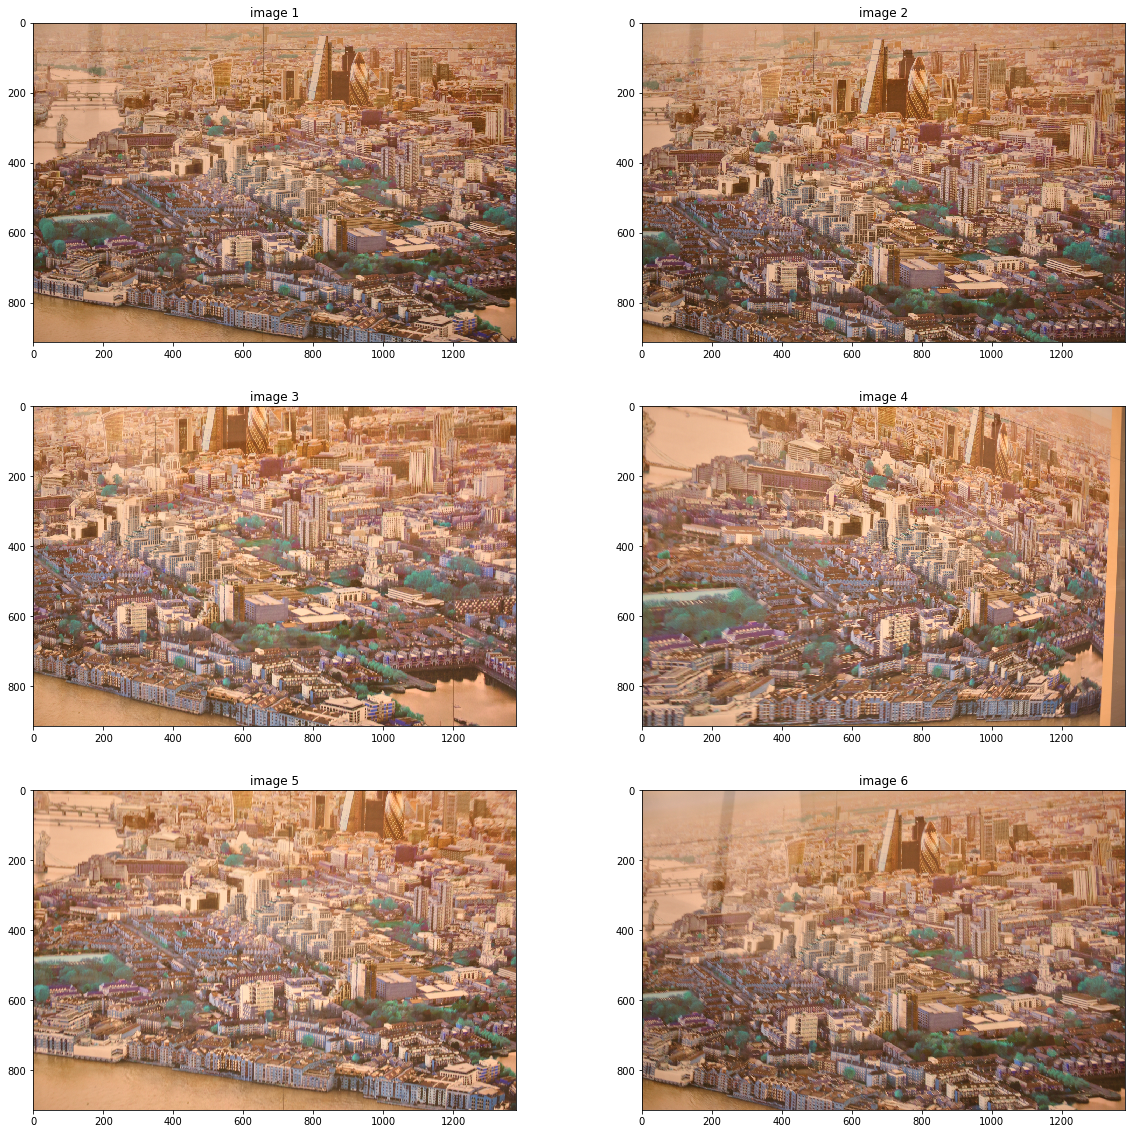

In [229]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
for i, axx in enumerate(ax.ravel()):
    axx.imshow(images[i])
    axx.set_title('image {}'.format(i+1))
plt.show()

### TRANSFORMATIONS

In [230]:
transformations_matrices = []

for transf in transformations:
    with open(transf) as file:
        s = file.read()
        nrs = re.split('\n| ',s)[:-1]
        transformations_matrices.append(np.array(nrs).reshape(3,3).astype(np.float))

In [231]:
transformations_matrices

[array([[ 8.8632e-01, -1.2492e-02, -1.3692e+02],
        [-4.7209e-02,  1.0157e+00,  4.2178e+01],
        [-1.4230e-04,  1.8595e-05,  1.0005e+00]]),
 array([[ 8.6273e-01,  3.0727e-02, -2.5765e+02],
        [-8.1274e-02,  1.0175e+00, -4.8986e+01],
        [-1.6043e-04,  4.4449e-05,  1.0008e+00]]),
 array([[ 2.4144e+00, -2.2023e-03, -1.9930e+02],
        [ 5.2146e-01,  2.0547e+00, -5.6949e+02],
        [ 1.0423e-03,  8.4489e-05,  1.0043e+00]]),
 array([[ 1.3838e+00,  2.4181e-02, -9.3882e+01],
        [ 9.3344e-02,  1.3070e+00, -2.3276e+02],
        [ 1.5995e-04,  6.7546e-05,  1.0008e+00]]),
 array([[ 7.7105e-01, -9.7833e-02, -3.6994e+00],
        [-9.2675e-02,  8.1167e-01,  9.2799e+01],
        [-1.3920e-04, -1.2806e-04,  9.9964e-01]])]

In [232]:
dot_one = np.array([400,400,1]).reshape(3,1)

In [233]:
new_dots = [ np.dot(tr, dot_one) for tr in transformations_matrices]

In [234]:
new_dots_normalized = [ dot/dot[2,0] for dot in new_dots]

In [235]:
dots_to_plot = [np.array([400,400,1]).reshape(3,1)] + new_dots_normalized

In [236]:
len(dots_to_plot)

6

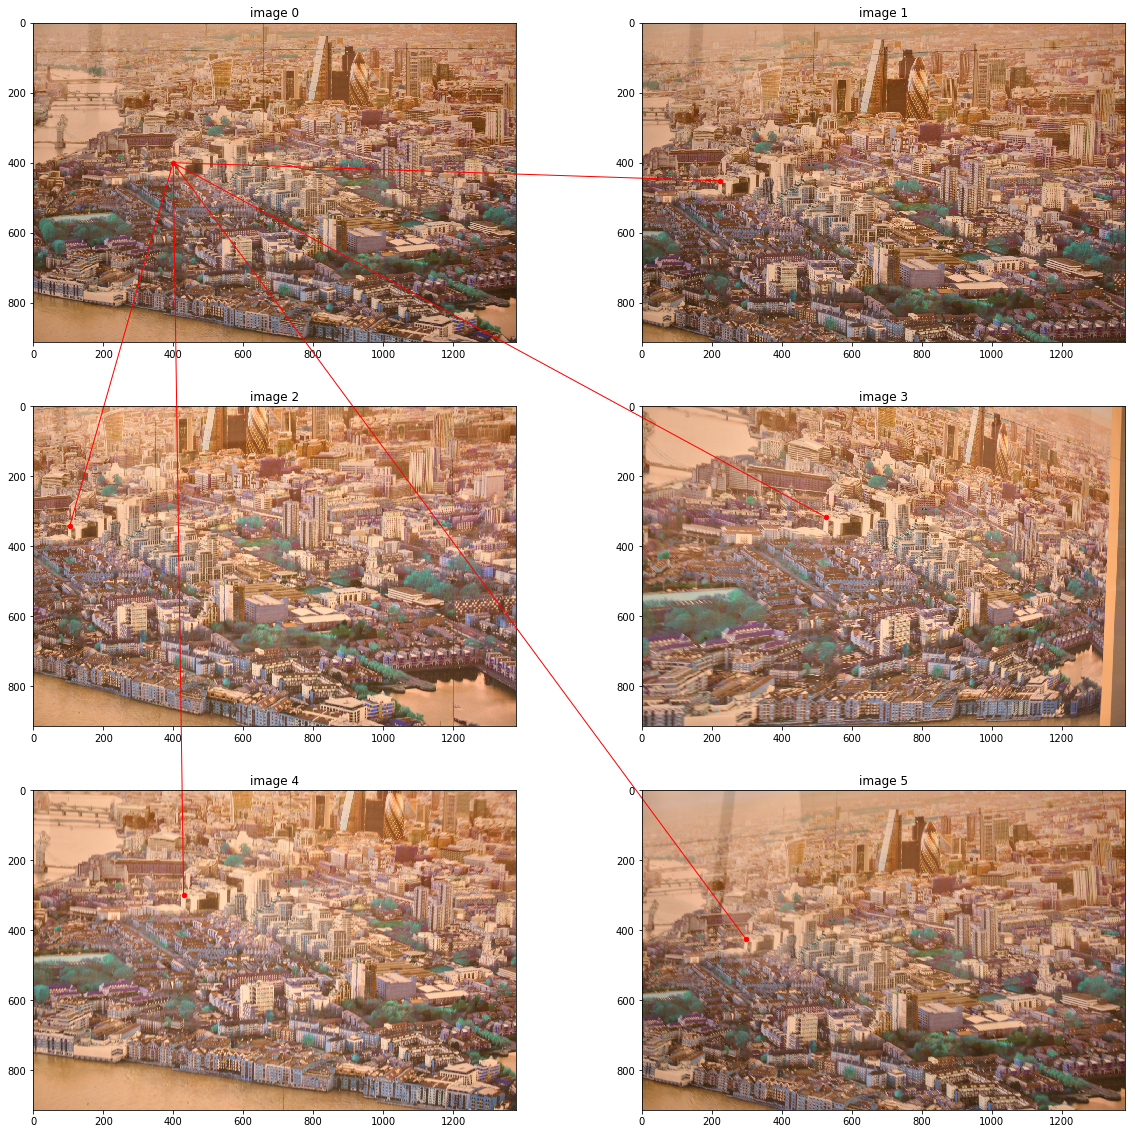

In [240]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(20,20))
for i, axx in enumerate(ax.ravel()):
    axx.imshow(images[i])
    axx.scatter(dots_to_plot[i][0,0],(dots_to_plot[i])[1,0], s=20, c='red')
    if i != 0:
        con = ConnectionPatch(xyA=(dots_to_plot[i][0,0],dots_to_plot[i][1,0]), xyB=(400,400),
                              coordsA="data", coordsB="data",
                              axesA=axx, axesB=ax.ravel()[0], color="red")
        axx.add_artist(con)
    axx.set_title('image {}'.format(i))
plt.show()